In [1]:
'''Zadanie 1'''
import pandas as pd
import os

file_names = [f'{i:04}.parquet' for i in range(15)]

data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)

print("Typy danych w ramce DataFrame:")
print(df.dtypes)

memory_usage = df.memory_usage(deep=True).sum()
print(f"Wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {memory_usage / (1024 ** 3):.2f} GB")

Typy danych w ramce DataFrame:
sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object
Wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 19.51 GB


Typy danych w ramce DataFrame:
sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object
Początkowa wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 19.51 GB
Zoptymalizowana wielkość pamięci RAM zajmowanej przez ramkę DataFrame: 14.28 GB


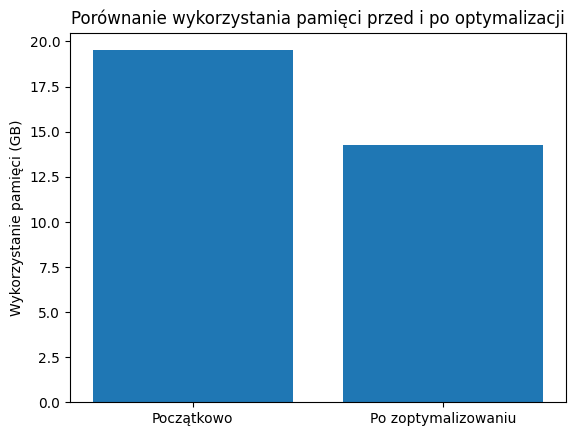

In [2]:
'''Zadanie 2'''
import pandas as pd
import os
import matplotlib.pyplot as plt

file_names = [f'{i:04}.parquet' for i in range(15)]

data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)

print("Typy danych w ramce DataFrame:")
print(df.dtypes)

initial_memory_usage = df.memory_usage(deep=True).sum()
print(f"Początkowa wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {initial_memory_usage / (1024 ** 3):.2f} GB")

def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':
            num_unique_values = df[col].nunique()
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        elif col_type == 'int64':
            df[col] = df[col].astype('int32')
        elif col_type == 'float64':
            df[col] = df[col].astype('float32')
    return df

df_optimized = optimize_dataframe(df)

optimized_memory_usage = df_optimized.memory_usage(deep=True).sum()
print(f"Zoptymalizowana wielkość pamięci RAM zajmowanej przez ramkę DataFrame: {optimized_memory_usage / (1024 ** 3):.2f} GB")

memory_usage_data = {
    'Początkowo': initial_memory_usage / (1024 ** 3),
    'Po zoptymalizowaniu': optimized_memory_usage / (1024 ** 3)
}

plt.bar(memory_usage_data.keys(), memory_usage_data.values())
plt.ylabel('Wykorzystanie pamięci (GB)')
plt.title('Porównanie wykorzystania pamięci przed i po optymalizacji')
plt.show()

Group and Aggregate (post_type, likes) - Oryginał: 0.33 sekund, Zoptymalizowany: 0.23 sekund
Filter Data (followers > 1000) - Oryginał: 1.36 sekund, Zoptymalizowany: 0.77 sekund
Sort Data (date) - Oryginał: 37.10 sekund, Zoptymalizowany: 35.80 sekund


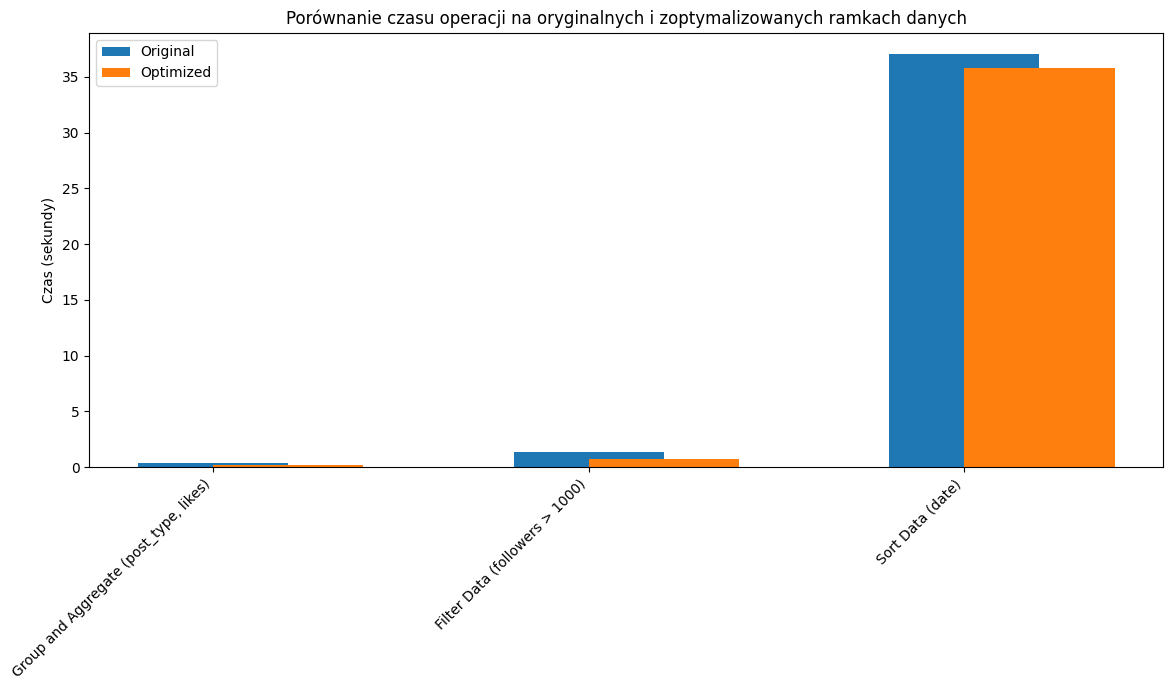

In [3]:
'''Zadanie 3'''
import pandas as pd
import time
import matplotlib.pyplot as plt

file_names = [f'{i:04}.parquet' for i in range(15)]
data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)
#print(df.columns)

def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:
                df[col] = df[col].astype('category')
        elif col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

df_optimized = optimize_dataframe(df)

def measure_time(operation, df):
    start = time.time()
    operation(df)
    end = time.time()
    return end - start

def group_and_aggregate(df):
    return df.groupby('post_type').agg({'likes': 'sum'})

def filter_data(df):
    return df[df['followers'] > 1000]

def sort_data(df):
    return df.sort_values(by='date')

operations = [group_and_aggregate, filter_data, sort_data]
operation_names = ['Group and Aggregate (post_type, likes)', 'Filter Data (followers > 1000)', 'Sort Data (date)']

original_times = [measure_time(op, df) for op in operations]
optimized_times = [measure_time(op, df_optimized) for op in operations]

for name, orig, opt in zip(operation_names, original_times, optimized_times):
    print(f"{name} - Oryginał: {orig:.2f} sekund, Zoptymalizowany: {opt:.2f} sekund")

x = range(len(operation_names))
plt.figure(figsize=(12, 7))
plt.bar(x, original_times, width=0.4, label='Original', align='center')
plt.bar(x, optimized_times, width=0.4, label='Optimized', align='edge')
plt.xticks(x, operation_names, rotation=45, ha='right')
plt.ylabel('Czas (sekundy)')
plt.title('Porównanie czasu operacji na oryginalnych i zoptymalizowanych ramkach danych')
plt.legend()
plt.tight_layout()
plt.show()

Group and Aggregate (post_type, likes) - Original: 0.32 seconds, Optimized: 0.28 seconds
Filter Data (followers > 1000) - Original: 0.98 seconds, Optimized: 0.93 seconds
Sort Data (date) - Original: 37.90 seconds, Optimized: 38.13 seconds


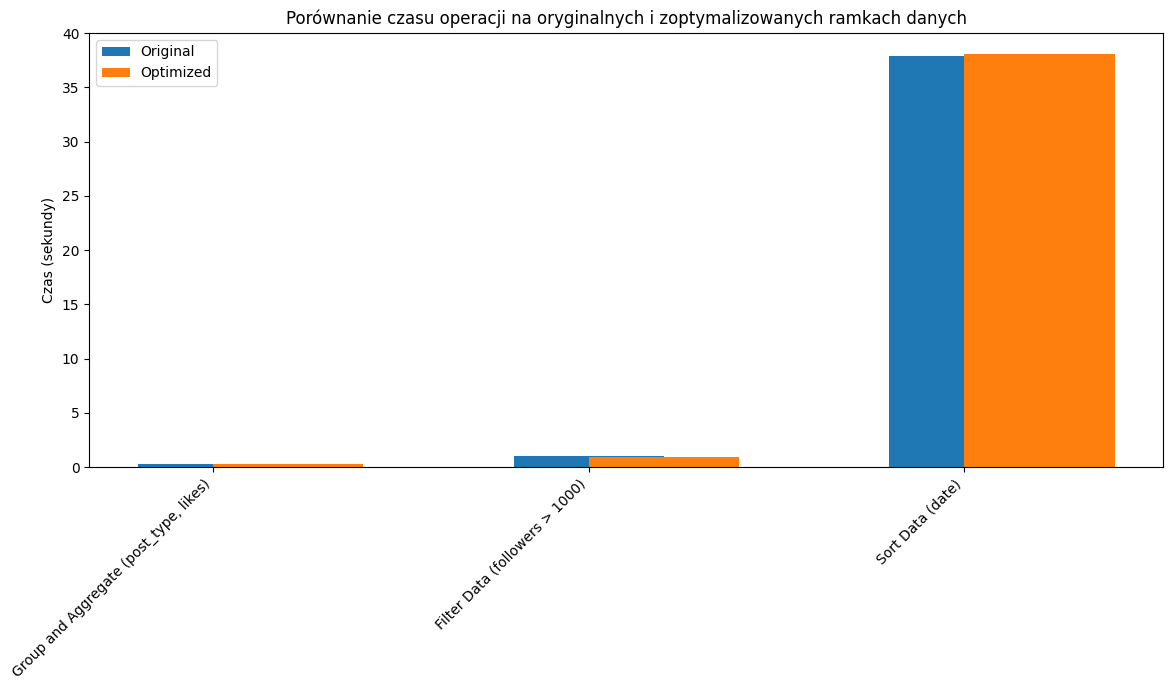

DataFrame został zapisany w 'optimized_data.csv' z nagłówkami i bez indeksu.

Całkowity rozmiar wszystkich plików Parquet: 2.5GB
Rozmiar pliku CSV: 6.1GB
Różnica (CSV - Parquet): 3.6GB


In [4]:
'''Zadanie 4'''
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

file_names = [f'{i:04}.parquet' for i in range(15)]

data_frames = [pd.read_parquet(file) for file in file_names]
df = pd.concat(data_frames, ignore_index=True)
#print(df.columns)

def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:
                df[col] = df[col].astype('category')
        elif col_type == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif col_type == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

df_optimized = optimize_dataframe(df)

def measure_time(operation, df):
    start = time.time()
    operation(df)
    end = time.time()
    return end - start

def group_and_aggregate(df):
    return df.groupby('post_type').agg({'likes': 'sum'})

def filter_data(df):
    return df[df['followers'] > 1000]

def sort_data(df):
    return df.sort_values(by='date')

operations = [group_and_aggregate, filter_data, sort_data]
operation_names = [
    'Group and Aggregate (post_type, likes)',
    'Filter Data (followers > 1000)',
    'Sort Data (date)'
]

original_times = [measure_time(op, df) for op in operations]
optimized_times = [measure_time(op, df_optimized) for op in operations]

for name, orig, opt in zip(operation_names, original_times, optimized_times):
    print(f"{name} - Original: {orig:.2f} seconds, Optimized: {opt:.2f} seconds")

x = range(len(operation_names))
plt.figure(figsize=(12, 7))
plt.bar(x, original_times, width=0.4, label='Original', align='center')
plt.bar(x, optimized_times, width=0.4, label='Optimized', align='edge')
plt.xticks(x, operation_names, rotation=45, ha='right')
plt.ylabel('Czas (sekundy)')
plt.title('Porównanie czasu operacji na oryginalnych i zoptymalizowanych ramkach danych')
plt.legend()
plt.tight_layout()
plt.show()

output_csv = 'optimized_data.csv'
df_optimized.to_csv(output_csv, index=False)
print(f"DataFrame został zapisany w '{output_csv}' z nagłówkami i bez indeksu.")

def sizeof_fmt(num, suffix='B'):
    for unit in ['','K','M','G','T','P','E','Z']:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Y{suffix}"

total_parquet_size = 0
for file in file_names:
    if os.path.exists(file):
        size = os.path.getsize(file)
        total_parquet_size += size
    else:
        print(f"Ostrzeżenie: {file} nie istnieje i zostanie pominięty przy obliczaniu rozmiaru.")

if os.path.exists(output_csv):
    csv_size = os.path.getsize(output_csv)
else:
    csv_size = 0
    print(f"Błąd: {output_csv} nie znaleziono.")

print(f"\nCałkowity rozmiar wszystkich plików Parquet: {sizeof_fmt(total_parquet_size)}")
print(f"Rozmiar pliku CSV: {sizeof_fmt(csv_size)}")
print(f"Różnica (CSV - Parquet): {sizeof_fmt(csv_size - total_parquet_size)}")

In [ ]:
'''Zadanie 5'''
import dask.dataframe as dd
import time
import pandas as pd
import os
import multiprocessing


def read_full_dask():
    #print("Rozpoczynanie wczytywania całego pliku na raz za pomocą Dask...")
    start = time.time()
    df = dd.read_csv('zamowienia.csv', sep=';', encoding='latin1')
    df.compute()
    end = time.time()
    czas = end - start
    print(f"Czas wczytywania całego pliku na raz: {czas:.2f} sekund")
    return czas


def read_blocks_dask():
    #print("Rozpoczynanie wczytywania pliku z blokami za pomocą Dask...")
    start = time.time()
    df = dd.read_csv('zamowienia.csv', sep=';', encoding='latin1', blocksize=25e6)
    df.compute()
    end = time.time()
    czas = end - start
    print(f"Czas wczytywania pliku z blokami (blocksize=25MB): {czas:.2f} sekund")
    return czas


def split_csv(n_splits):
    #print(f"Rozpoczynanie podziału pliku na {n_splits} części...")
    df = pd.read_csv('zamowienia.csv', sep=';', encoding='latin1')
    split_size = len(df) // n_splits
    for i in range(n_splits):
        split_df = df.iloc[i * split_size: (i + 1) * split_size]
        split_df.to_csv(f'zamowienia_split_{i}.csv', sep=';', index=False)
    if len(df) % n_splits != 0:
        split_df = df.iloc[n_splits * split_size:]
        split_df.to_csv(f'zamowienia_split_{n_splits}.csv', sep=';', index=False)
    #print("Podział pliku zakończony.")


def read_file(file):
    #print(f"Wczytywanie pliku {file}...")
    df = pd.read_csv(file, sep=';', encoding='latin1')
    #print(f"Wczytywanie pliku {file} zakończone.")
    return df


def read_multiprocessing(n_processes):
    #print(f"Rozpoczynanie wczytywania plików za pomocą multiprocessing z {n_processes} procesami...")
    files = sorted([f for f in os.listdir('.') if f.startswith('zamowienia_split_') and f.endswith('.csv')])
    with multiprocessing.Pool(processes=n_processes) as pool:
        df_list = pool.map(read_file, files)
    df = pd.concat(df_list, ignore_index=True)
    #print("Wczytywanie za pomocą multiprocessing zakończone.")
    return df


def main():
    cores = os.cpu_count()
    processes1 = max(1, cores - 2)
    processes2 = max(1, (cores - 2) * 2)

    read_full_dask()
    read_blocks_dask()

    split_csv(processes2)

    start = time.time()
    df_multiproc1 = read_multiprocessing(processes1)
    end = time.time()
    czas3 = end - start
    print(f"Czas wczytywania z użyciem multiprocessing (procesów: {processes1}): {czas3:.2f} sekund")

    start = time.time()
    df_multiproc2 = read_multiprocessing(processes2)
    end = time.time()
    czas4 = end - start
    print(f"Czas wczytywania z użyciem multiprocessing (procesów: {processes2}): {czas4:.2f} sekund")

    for i in range(processes2 + 1):
        file = f'zamowienia_split_{i}.csv'
        if os.path.exists(file):
            os.remove(file)
            #print(f"Usunięto plik {file}.")


if __name__ == '__main__':
    main()


Czas wczytywania całego pliku na raz: 0.07 sekund
Czas wczytywania pliku z blokami (blocksize=25MB): 0.03 sekund
Czas wczytywania z użyciem multiprocessing (procesów: 10): 2.72 sekund
Czas wczytywania z użyciem multiprocessing (procesów: 20): 5.11 sekund